In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.io import ascii
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky
from astropy import wcs
from astropy import units as u
from astropy.time import Time

In [12]:
image_1 = 'PAL5_data/PAL5__e1/PAL5__e1_3p6um.fits'
image_2 = 'PAL5_data/PAL5__e2/PAL5__e2_3p6um.fits'

hdr_1_list = fits.open(image_1)
hdr_1 = hdr_1_list[0].header
time1 = Time(hdr_1['DATE_OBS'])
print(time1)
hdr_1_list.close()
data_1 = fits.getdata(image_1, ext = 0)

hdr_2_list = fits.open(image_2)
hdr_2 = hdr_2_list[0].header
time2 = Time(hdr_2['DATE_OBS'])
print(time2)
hdr_2_list.close()
data_2 = fits.getdata(image_2, ext = 0)

timedelta = time2 - time1
print(timedelta.sec)

2013-05-10T21:50:03.531
2013-05-10T23:31:44.653
6101.122000000001


In [5]:
file_1 = r'C:/Users/lukeb/Documents/MPhys_RRLs/output_files/aperphot_epoch1_3p6um.txt'
file_2 = r'C:/Users/lukeb/Documents/MPhys_RRLs/output_files/aperphot_epoch2_3p6um.txt'

f1 = ascii.read(file_1, delimiter = ',')
f2 = ascii.read(file_2, delimiter = ',')
print(f1)
print(f2)

 id      xcenter            ycenter          apparent_mag   
--- ------------------ ------------------ ------------------
  1  1335.720143020897 23.327156319119105                nan
  2 1017.0720463346273 24.456138934630374                nan
  3 1325.4233008232586 24.020858198156862                nan
  4 1267.5653109644136 27.531396027205712 17.188493864883704
  5 1138.3723108598422 28.990911636363123 16.848209928292306
  6 1300.2369547517922  29.59304179692155 16.491523044087106
  7  722.2239316998908 37.943258438011256                nan
  8  797.6394285408744  39.45556477253797                nan
  9  910.4856114937096  40.64482026688873 17.511316552353712
 10 1150.0528392801152  41.60175334170861 15.136903265073004
...                ...                ...                ...
587 1144.7378003870824  653.5186435069699                nan
588 186.06820051159417  654.7334220021861 18.169397190640368
589  1036.070774010111   653.706049999948                nan
590  980.1803416221136  

[-99 -99   3   4   5 -99   7   9 -99 -99 -99  11  12 -99  15  18  17  19
 -99 -99  23  22 -99  26 -99  28 -99  32 -99 -99  35  36  37 -99 -99  38
  40  43  41 -99  44  45  46  47  49  48  51  52  55  59  60 -99  62  61
 -99  63  65  67  68  69  70  72  73  75 -99  76  77  78  79 -99  80  81
  82  86  87  88  89  91  92  95  97  98  99 100 101 102 -99 103 106 104
 105 -99 108 -99 109 110 111 -99 112 114 118 -99 117 -99 -99 -99 119 120
 -99 121 123 125 126 124 128 129 130 -99 131 132 -99 -99 133 134 137 138
 139 140 141 142 144 146 -99 147 148 149 150 152 -99 151 153 154 -99 155
 157 -99 158 159 -99 160 -99 162 163 164 169 167 168 172 173 175 176 174
 -99 179 178 180 181 185 182 186 183 188 -99 187 -99 -99 191 190 192 195
 -99 -99 196 198 199 202 -99 203 204 -99 205 206 211 209 212 -99 213 -99
 216 215 218 221 219 220 226 -99 224 225 229 227 228 230 231 232 -99 235
 236 237 238 -99 240 241 243 244 248 245 246 247 249 250 252 -99 -99 -99
 253 -99 -99 255 257 259 260 -99 263 -99 -99 -99 26

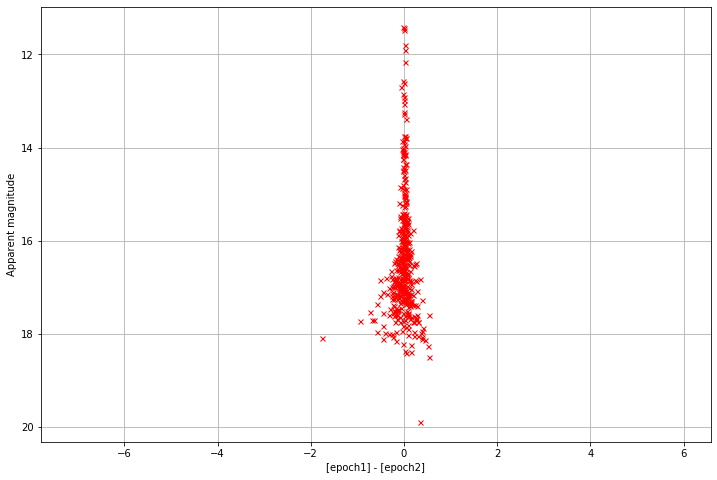

 id      xcenter            ycenter          apparent_mag   
--- ------------------ ------------------ ------------------
  1  1335.720143020897 23.327156319119105                nan
  2 1017.0720463346273 24.456138934630374                nan
  3 1325.4233008232586 24.020858198156862                nan
  4 1267.5653109644136 27.531396027205712 17.188493864883704
  5 1138.3723108598422 28.990911636363123 16.848209928292306
  6 1300.2369547517922  29.59304179692155 16.491523044087106
  7  722.2239316998908 37.943258438011256                nan
  8  797.6394285408744  39.45556477253797                nan
  9  910.4856114937096  40.64482026688873 17.511316552353712
 10 1150.0528392801152  41.60175334170861 15.136903265073004
...                ...                ...                ...
587 1144.7378003870824  653.5186435069699                nan
588 186.06820051159417  654.7334220021861 18.169397190640368
589  1036.070774010111   653.706049999948                nan
590  980.1803416221136  

In [20]:
x_1 = f1['xcenter']
y_1 = f1['ycenter']
x_2 = f2['xcenter']
y_2 = f2['ycenter']

w1 = wcs.WCS(hdr_1)
w2 = wcs.WCS(hdr_2)

coord_1 = np.transpose((x_1, y_1))
coord_2 = np.transpose((x_2, y_2))
world_1 = w1.wcs_pix2world(coord_1, 0)
world_2 = w2.wcs_pix2world(coord_2, 0)

ra_1, dec_1 = world_1[:, 0], world_1[:, 1]
ra_2, dec_2 = world_2[:, 0], world_2[:, 1]

c_1 = SkyCoord(ra_1, dec_1, frame = 'icrs', unit = 'deg')
c_2 = SkyCoord(ra_2, dec_2, frame = 'icrs', unit = 'deg')

idx, d2d, d3d = c_2.match_to_catalog_sky(c_1)

# append new ra and dec coordinates to existing files
f1['ra'] = ra_1
f1['dec'] = dec_1
f2['ra'] = ra_2
f2['dec'] = dec_2

# following tutorial, must ensure any matches are significant
radius = 0.0001
selection = (d2d > radius*u.deg)
match_index = idx
match_index[selection] = -99.
print(match_index)
matches = (match_index >= 0)

mag_1 = f1['apparent_mag'][match_index][matches]
mag_2 = f2['apparent_mag'][matches]
delta_mag = mag_1 - mag_2
print(len(delta_mag))

matched_tbl_1 = Table()
matched_tbl_2 = Table()
ra_1m, dec_1m = f1['ra'][match_index][matches], f1['dec'][match_index][matches]
ra_2m, dec_2m = f2['ra'][matches], f2['dec'][matches]
matched_tbl_1['ra1'], matched_tbl_1['dec1'] = ra_1m, dec_1m
matched_tbl_2['ra2'], matched_tbl_2['dec2'] = ra_2m, dec_2m
matched_tbl_1['mag_1'] = mag_1
matched_tbl_2['mag_1'] = mag_2
print(matched_tbl_1)
print(matched_tbl_2)

plt.plot(delta_mag, mag_1, 'rx', markersize = 5)
plt.xlabel('[epoch1] - [epoch2]')
plt.ylabel('Apparent magnitude')
plt.grid()
plt.axis('equal')
plt.gca().invert_yaxis()
plt.gcf().set_size_inches(12, 8)
plt.show()
plt.close()

print(f1['id', 'xcenter', 'ycenter', 'apparent_mag'])
print(f2['id', 'xcenter', 'ycenter', 'apparent_mag'])